## ID : 816000325
## Name: Ajay Sieunarine
## Email: ajay.sieunarine@my.uwi.edu
## Repo: https://github.com/jefroy/big-data-A4

In [64]:
# math and graph stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# text analysis stuff
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from string import punctuation

# ML stuff
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score
from sklearn import svm
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

# utility stuff
from sklearn.utils import shuffle
from itertools import chain
from sklearn.preprocessing import LabelEncoder

# more graph stuff
%matplotlib inline
plt.style.use('dark_background') # turn off for light theme
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sep = '============================================================================================'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\idisc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\idisc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Warm Up (20 marks) 

In [65]:
# documents/sentences
corpus = [ 
    'Apple Orange Orange Apple',
    'Apple Banana Apple Banana',
    'Banana Apple Banana Banana Banana Apple',
    'Banana Orange Banana Banana Orange Banana',
    'Banana Apple Banana Banana Orange Banana'
]

def corp2vec(corpus):
    '''
    This function converts a document to a vector showing its term frequencies.
    Each column represents a term in the corpus. (in this case, there are 3 terms).
    Uses CountVectorizer() as a model.
    '''
    tf_vectorizer = CountVectorizer() # model
    tf = tf_vectorizer.fit_transform(corpus) # get term frequencies
    return tf.A # return the array representation

print(type(corp2vec(corpus)))
print(corp2vec(corpus))

<class 'numpy.ndarray'>
[[2 0 2]
 [2 2 0]
 [2 4 0]
 [0 4 2]
 [1 4 1]]


# Preprocessing and Data Organization (20 marks) 

In [66]:
df = pd.read_csv('MrTrumpSpeeches.csv', sep='~', encoding="ISO-8859-1")

# remove this line please
# df = df[:10]

print(df.shape)
df.head()

(836, 9)


,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...


In [67]:
df.dtypes

id                 object
playlist           object
upload_date         int64
title              object
view_count        float64
average_rating    float64
like_count        float64
dislike_count     float64
subtitles          object
dtype: object

## Task 1: 
Create a new column in the dataframe called 'sentiment'. Using appropriate existing columns, populate the new column with 0's and 1's where 0 refers to a negative sentiment and 1 refers to a positive sentiment. 

- using the `average_rating` column, find the average score
    * ratings above or equal to this average are denoted by sentiment = 1
    * ratings under this average are denoted by sentiment = 0

In [68]:
# find the avg/mid score possible:
max_score = max(df['average_rating'])
min_score = min(df['average_rating'])
avg_score = (max_score + min_score) / 2
print(max_score)
print(min_score)
print(avg_score)

5.0
1.34782612324
3.17391306162


In [69]:
def pruneRating(x):
    '''
    utility function for lambda
    returns 1 for good/avg rating
    returns 0 for bad rating
    '''
    if x >= avg_score:
        return 1
    if x < avg_score:
        return 0

df['sentiment'] = df['average_rating'].apply(
    lambda x: pruneRating(x)
)

enc3 = LabelEncoder()
enc3.fit(df['sentiment'])

print(enc3.classes_)
print(sep)
print(df['sentiment'].describe()) 
print(sep)
df.head()

[0 1]
count    836.000000
mean       0.903110
std        0.295985
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sentiment, dtype: float64


,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,sentiment
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,1
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,1
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,1
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,1
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,1


## Task 2
- Clean the subtitles data and store the cleaned text in a new column 'subtitle_clean'.
    * For each step of your text cleaning give a brief explanation of why you chose to perform that method on the text. 

In [70]:
# this block of code will take a little while to process since the text is being thoroughly cleaned.
wnl = WordNetLemmatizer()
porter = PorterStemmer()
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation.
    2. Remove all stopwords.
    4. Convert all remaining words to lowercase.
        - if the string has numbers in it, discard it.
    5. Lemmatize.
    6. Convert to the stem of the word.
    7. Returns a list of the cleaned text.
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # convert all words to lowercase and lemmatize and stem
    
    arr = []
    for word in words:
        word = word.lower()
        word = porter.stem(word)
        word = wnl.lemmatize(word)
        if word.isalpha():
            word += ' '
            arr.append(word)
        
    arr = ''.join(arr) # convert the array of words/tokens into a string
#     print(arr,sep)
    if len(arr) > 0:
        return arr
    else:
        return "smeckledorf" # if the entire subtitle had no words in it.

def test_text_process():
    '''
    function to hold some test cases to ensure the lambda function does its job
    '''
    print(
        'Test stopwords and lowercase:\nHI I AM A STOPWORD = ', 
        text_process("HI I AM A STOPWORD")
    )
    print(sep)
    print(
        'Test Stemming words and removing punctuation:\nfishing, fisher, fished = ', 
        text_process("fishing, fisher , fished")
    )

def pruneSubtitle(x):
    '''
    utility function for lambda
    x - string from `subtitles` col
    '''
    return text_process(x)

# test_text_process()

df['subtitle_clean'] = df['subtitles'].apply(
    lambda x: pruneSubtitle(x)
)

df.head()

,id,playlist,upload_date,title,view_count,average_rating,like_count,dislike_count,subtitles,sentiment,subtitle_clean
0,-2WTNSujhjk,Donald Trump Speeches & Events,20160220,Live Stream: Donald Trump Victory Rally in Spa...,4057.0,4.259259,44.0,10.0,presidents of the United States mr. go tr...,1,presid unit state mr go trapp famili thank app...
1,-64nfy6i58w,Donald Trump Speeches & Events,20161107,LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...,47276.0,4.358025,952.0,182.0,it's now officially Tuesday November a di...,1,offici tuesday novemb ever think youd hear maj...
2,-7Sp31hTxkU,Donald Trump Speeches & Events,20160423,"FULL SPEECH: Donald Trump Rally in Bridgeport,...",19966.0,4.666667,220.0,20.0,you [Music] [Music] [Music] you I...,1,music music music great countri leader free un...
3,-byuyavcNI4,Donald Trump Speeches & Events,20160617,"Full Speech: Donald Trump Rally in Houston, Te...",15138.0,4.582491,266.0,31.0,we welcome stars and president [Music] ...,1,welcom star presid music place live place wow ...
4,09BXh-AA72M,Donald Trump Speeches & Events,20161105,"Full Speech: Donald Trump Rally in Denver, Col...",8720.0,4.924731,365.0,7.0,you thank you [Music] great people Gr...,1,thank music great peopl granna three day go wi...


I chose to Lemmatize AND Stem each word since the amount of text being processed is very large, and this will also allow the models to get better results.

## Task 3
Use TFIDFVectorizer and CountVectorizer to encode the cleaned subtitles. 

In [71]:
# # define the data to use
clean_subs = list(df['subtitle_clean']) 
# clean_subs = list(df['subtitle_clean']) # this line might be crashing the file 
# # clean_subs = df['subtitle_clean'].values # kinda pointless, parsing as list() is neater
# # jupyter might require more memory to run this

print(type(clean_subs))
print(sep)
print(len(clean_subs))

<class 'list'>
836


In [72]:
# CountVectorizer
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(clean_subs)
print("CountVectorizer:")
print(tf)
print(sep)
print(tf_vectorizer.get_feature_names())

CountVectorizer:
  (0, 10152)	3
  (0, 13924)	2
  (0, 12460)	4
  (0, 8565)	2
  (0, 5403)	62
  (0, 13495)	1
  (0, 4554)	6
  (0, 13116)	16
  (0, 619)	7
  (0, 8620)	6
  (0, 4361)	3
  (0, 14519)	9
  (0, 14407)	16
  (0, 1140)	2
  (0, 9683)	24
  (0, 12271)	7
  (0, 1977)	7
  (0, 12301)	5
  (0, 7173)	10
  (0, 5310)	11
  (0, 7614)	1
  (0, 1492)	1
  (0, 7316)	3
  (0, 14499)	3
  (0, 9877)	3
  :	:
  (835, 9234)	1
  (835, 5594)	1
  (835, 5192)	1
  (835, 3192)	1
  (835, 8545)	1
  (835, 9450)	1
  (835, 14605)	1
  (835, 12309)	1
  (835, 14390)	1
  (835, 4727)	1
  (835, 12113)	1
  (835, 13300)	1
  (835, 12915)	1
  (835, 14421)	1
  (835, 11955)	1
  (835, 12360)	1
  (835, 1655)	1
  (835, 6046)	2
  (835, 1599)	1
  (835, 10379)	1
  (835, 9162)	1
  (835, 7976)	1
  (835, 14036)	1
  (835, 14578)	1
  (835, 9001)	1
['aah', 'aaron', 'ab', 'aback', 'abaddon', 'abama', 'abandon', 'abat', 'abba', 'abbey', 'abbi', 'abbot', 'abc', 'abdallah', 'abduct', 'abdul', 'abdulaziz', 'abdullah', 'abe', 'abedin', 'aberdeen', 'ab

In [73]:
# TFIDF 
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(clean_subs)
print("TFIDF:")
print(tfidf)
print(sep)
print(tfidf_vec.get_feature_names())

TFIDF:
  (0, 7486)	0.04751205147799466
  (0, 5962)	0.011326455170446947
  (0, 8794)	0.051128536589619536
  (0, 10050)	0.017727621150160796
  (0, 7127)	0.013401604985027887
  (0, 5560)	0.03751860862489499
  (0, 8229)	0.01524322982417649
  (0, 5651)	0.01524322982417649
  (0, 5477)	0.01629221174807671
  (0, 13692)	0.009848201417937272
  (0, 14595)	0.013130721163506597
  (0, 4350)	0.026073154100270227
  (0, 14728)	0.011517603639049308
  (0, 8055)	0.013130721163506597
  (0, 14550)	0.022747491274833234
  (0, 13136)	0.1378572939353654
  (0, 7234)	0.028093099934258476
  (0, 591)	0.03662090696140283
  (0, 3095)	0.028657662201300227
  (0, 6143)	0.016623917442992395
  (0, 8559)	0.04475267227581382
  (0, 12569)	0.013192290834575914
  (0, 2873)	0.01655628170074303
  (0, 2527)	0.026209098588279897
  (0, 7845)	0.04375087064314803
  :	:
  (835, 11441)	0.06263014500554266
  (835, 11053)	0.009706425773658559
  (835, 5444)	0.01622395738546941
  (835, 1916)	0.02560363678540844
  (835, 8798)	0.038339720515

## Text Classification (30 marks) 

### Task 1
When choosing a metric to access the performance of your classifier provide a brief explanation of why you chose that metric.

Overall, both methods are good supervised machine learning classification methods.

- Logistic Regression:
    * very good option since the target varaible (sentiment column) is binary (0,1).
    * the encoded data from TF and TFIDF supply good values.

- SVM:
    * also good at solving regression problems like this.
    * similarly to logistic regression as a model: it also excels at solving a non-probabilistic binary problem.
    

## Task 2
Perform the following classification experiments keeping track of the performance of each classification task for future use: 
1. Logistic regression model on word count 
2. Logistic regression model on TFIDF 
3. Logistic regression model on TFIDF + ngram 
4. Support Vector Machine model on word count 
5. Support Vector Machine model on TFIDF 
6. Support Vector Machine model on TFIDF + ngram

In [74]:
def text_fit(X, y, model, clf_model):
    """
    X - data
    y - target variables
    model - model for the word processing, tfidf, countvectorization etc
    clf_model - classification algorithm, classifier (in this case, logistic regression)
    coef_show - show the top coeefs if true (1)
    """
    X_c = model.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
#     print('type(X_c): ', type(X_c)) # sparse matrix
    print('# features: {}'.format(X_c.shape[1]))
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    print('Model Recall: {}'.format(recall))
    print('Model Accuracy: {}'.format(acc))
    
    w = model.get_feature_names()
    coef = clf.coef_.tolist()[0] # ??
    coeff_df = pd.DataFrame({
        'Word': w, 'Coefficient': coef
    })
    coeff_df = coeff_df.sort_values(
        ['Coefficient', 'Word'], ascending=[0,1]
    )
    print(sep)
    print('-Top 5 positive-')
    print(coeff_df.head(5).to_string(index=False))
    print(sep)
    print('-Top 5 negative')
    print(coeff_df.tail(5).to_string(index=False))
    
    return recall, acc

In [75]:
df = df[df['average_rating'] != avg_score] # remove mean values so the classifiers give more meaningful predictions
X = df['subtitle_clean'] # data
y = df['sentiment'] # target variable

c = CountVectorizer()
tfidf = TfidfVectorizer()

In [76]:
X.head()

0    presid unit state mr go trapp famili thank app...
1    offici tuesday novemb ever think youd hear maj...
2    music music music great countri leader free un...
3    welcom star presid music place live place wow ...
4    thank music great peopl granna three day go wi...
Name: subtitle_clean, dtype: object

In [77]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: sentiment, dtype: int64

In [78]:
# Logistic regression and SVM models on word count (tf)
recall_LR_tf, acc_LR_tf = text_fit(X, y, c, LogisticRegression())
print(sep)
recall_SVM_tf, acc_SVM_tf = text_fit(X, y, c, LinearSVC())

C:\Users\idisc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# features: 14928
# train records: 627
# test records: 209
Model Recall: 0.9583333333333334
Model Accuracy: 0.8947368421052632
-Top 5 positive-
   Word  Coefficient
   came     0.384998
     go     0.384403
  world     0.269173
 presid     0.266595
  north     0.260389
-Top 5 negative
  Word  Coefficient
  meet    -0.376447
 click    -0.413080
  weve    -0.432682
  rate    -0.436773
 hello    -0.583852
# features: 14928
# train records: 627
# test records: 209
Model Recall: 0.9427083333333334
Model Accuracy: 0.8899521531100478
-Top 5 positive-
   Word  Coefficient
 justic     0.136443
   came     0.118361
   valu     0.116963
   wait     0.113117
   safe     0.110145
-Top 5 negative
  Word  Coefficient
 readi    -0.122900
 block    -0.125479
  meet    -0.132964
  weve    -0.154146
 hello    -0.169834


In [79]:
# Logistic regression and SVM on tfidf
recall_LR_tfidf, acc_LR_tfidf = text_fit(X, y, tfidf, LogisticRegression())
print(sep)
recall_SVM_tfidf, acc_SVM_tfidf = text_fit(X, y, tfidf, LinearSVC())

# features: 14928
# train records: 627
# test records: 209
Model Recall: 1.0
Model Accuracy: 0.9186602870813397
-Top 5 positive-
    Word  Coefficient
      go     1.804093
    know     0.733776
 hillari     0.694946
 clinton     0.669516
    unit     0.586801
-Top 5 negative
     Word  Coefficient
   exclus    -0.669258
 subscrib    -0.684978
   youtub    -0.691747
    video    -0.730613
    click    -1.350778
# features: 14928
# train records: 627
# test records: 209
Model Recall: 0.9895833333333334
Model Accuracy: 0.9138755980861244
-Top 5 positive-
     Word  Coefficient
       go     0.991641
 american     0.539888
  affront     0.532553
   presid     0.530991
 question     0.506342
-Top 5 negative
    Word  Coefficient
 cabinet    -0.626775
  arnold    -0.635308
     eri    -0.657378
   click    -0.757825
   hello    -0.952330


In [80]:
# Logistic regression and SVM on tfidf and ngram
recall_LR_tfidf_ngram, acc_LR_tfidf_ngram = text_fit(X, y, TfidfVectorizer(ngram_range=(1,2)), LogisticRegression())
print(sep)
recall_SVM_tfidf_ngram, acc_SVM_tfidf_ngram = text_fit(X, y, TfidfVectorizer(ngram_range=(1,2)), LinearSVC())

# features: 364894
# train records: 627
# test records: 209
Model Recall: 1.0
Model Accuracy: 0.9186602870813397
-Top 5 positive-
    Word  Coefficient
      go     1.574058
    know     0.746196
   peopl     0.612748
 hillari     0.549001
 clinton     0.529385
-Top 5 negative
           Word  Coefficient
    video watch    -0.493150
   watch latest    -0.493150
 subscrib click    -0.496083
          video    -0.507337
          click    -0.955003
# features: 364894
# train records: 627
# test records: 209
Model Recall: 0.9947916666666666
Model Accuracy: 0.9186602870813397
-Top 5 positive-
       Word  Coefficient
         go     0.633822
     presid     0.330989
   american     0.308840
 unit state     0.297213
      korea     0.287086
-Top 5 negative
       Word  Coefficient
      video    -0.340760
 hello ring    -0.383042
 ring hello    -0.383042
      hello    -0.420756
      click    -0.607006


In [81]:
models = pd.DataFrame({
    'Model': [
        'LR on TF', 'SVM on TF',
        'LR on TFIDF', 'SVM on TFIDF',
        'LR on TFIDF w/ Ngram=2', 'SVM on TFIDF w/ Ngram=2'
    ],
    'Recall': [
        recall_LR_tf, recall_SVM_tf,
        recall_LR_tfidf, recall_SVM_tfidf,
        recall_LR_tfidf_ngram, recall_SVM_tfidf_ngram
    ],
    'Accuracy': [
        acc_LR_tf, acc_SVM_tf,
        acc_LR_tfidf, acc_SVM_tfidf,
        acc_LR_tfidf_ngram, acc_SVM_tfidf_ngram
    ],
})

models.sort_values(by='Accuracy', ascending=False)

,Model,Recall,Accuracy
2,LR on TFIDF,1.000000,0.918660
4,LR on TFIDF w/ Ngram=2,1.000000,0.918660
5,SVM on TFIDF w/ Ngram=2,0.994792,0.918660
3,SVM on TFIDF,0.989583,0.913876
0,LR on TF,0.958333,0.894737
1,SVM on TF,0.942708,0.889952


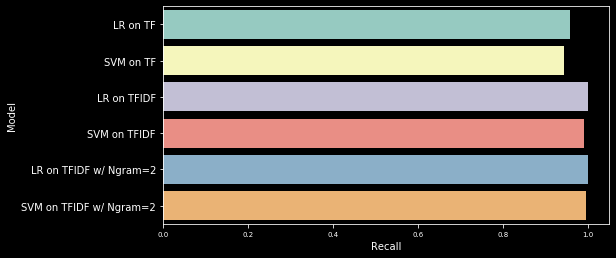

In [82]:
sns.barplot(x='Recall', y='Model', data=models)

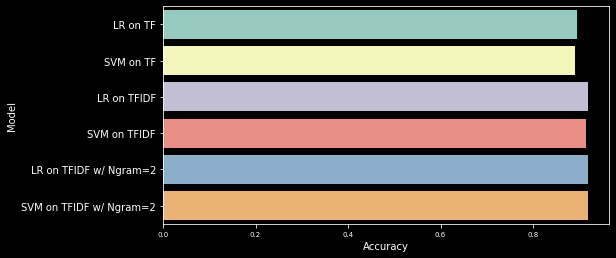

In [83]:
sns.barplot(x='Accuracy', y='Model', data=models)

As we can see, both models are performing very well on the data while using both text classifiers.

## Topic Modeling (20 marks)

## Task 2 - Topic Modeling
Using TFIDF and Count Vectorizer models imported for sklearn, perform topic modelling using the following topic modeling algorithms:
1. NMF
2. LDA
3. SVD.

In [84]:
# set up function for displaying the topics per document
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    '''
    H, W -> feature matricies
    feature_names -> labels
    documents -> text/data
    no_top_words -> number of topic words
    no_top_documents -> number of topic documents
    '''
    top_docs = []
    for topic_idx, topic in enumerate(H): # iterate through H
        print("Topic %d: " % (topic_idx)) # speech at index i
        print(" ".join([
            feature_names[i]
            for i in topic.argsort()[:-no_top_words - 1:-1]
        ]))
        
        print("\n")
        top_doc_indicies = np.argsort(W[:,topic_idx])[::-1][0:no_top_documents]
        
        doc_str = ""
        for doc_index in top_doc_indicies:
            doc_str += documents[doc_index]
            print(documents[doc_index])
            print("\n")
            print(sep)
        top_docs.append(doc_str)
        
    return top_docs

In [85]:
# set up the data for topic modeling
documents = list(X)
print(len(documents))

836


In [86]:
# tfidf model for NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [87]:
# raw term counts for LDA and SVD
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2)
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

## Task 2
When choosing the number of topics give a brief explanation of why that number was chosen. 

I chose to display 5 topics per model since the amount of text per row is so large.

In [111]:
no_topics = 5
no_top_words = 10
no_top_documents = 4

In [112]:
# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

In [113]:
# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

In [114]:
# SVD
lsi_model = TruncatedSVD(n_components=no_topics, n_iter=7, random_state=42).fit(tf)
lsi_W = lsi_model.transform(tf)
lsi_H = lsi_model.components_

In [115]:
print("NMF Topics \n\n")
nmf_top_docs = display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

NMF Topics 


Topic 0: 
go know peopl dont said get want say like theyr


incred love love oh better get jun rememb june seventh better get turn around want thank group see say latino trump love thank thank love sign true thank everybodi know place love california love state great feel know want bring friend friend remembr project outsid would take pictur said come stage coupl minut incred peopl lost love one illeg immigr theyr unbeliev theyv suffer ive gotten know period time come folk come great peopl theyv becom friend last coupl year realli suffer friend mine he realli becom great friend mine jameel shah mean son incred incred son go colleg scholarship go get scholarship great footbal player want jameel repres group say word explain happen tough tough son die unbeliev purpos what happen hear stori well understand go get back thing includ job jameel right okay jameel shaw great friend thank thank want bring back day donald trump come escal everybodi saw first day watch feel proud fi

In [116]:
print("\n\nLDA Topics \n\n")
lda_top_docs = display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)



LDA Topics 


Topic 0: 
presid thank american peopl state countri go america great unit


hello poland thank much husband enjoy visit beauti countri want thank presid mr duda warm welcom gener hospit opportun visit copernicu scienc center today found inform thought mission inspir peopl observ experi ask question seek answer think better purpos wonder scienc center thank involv give u tour especi child made wonder experi mani know main focu husband presid safeti secur american peopl think u agre peopl abl live live without fear matter countri live wish u around world thank wonder welcom special countri kind graciou hospit forgotten honor introduc husband presid unit state donald j trump applaus applaus thank much that nice unit state mani great diplomat truli better ambassador countri beauti first ladi milania thank milania nice weve come nation deliv import messag america love poland america love polish peopl thank poll greatli enrich region polish american also greatli enrich unit s

In [117]:
print("\n\nSVD Topics \n\n")
lsi_top_docs = display_topics(lsi_H, lsi_W, tf_feature_names, documents, no_top_words, no_top_documents)



SVD Topics 


Topic 0: 
go peopl know dont want get said say great like


incred love love oh better get jun rememb june seventh better get turn around want thank group see say latino trump love thank thank love sign true thank everybodi know place love california love state great feel know want bring friend friend remembr project outsid would take pictur said come stage coupl minut incred peopl lost love one illeg immigr theyr unbeliev theyv suffer ive gotten know period time come folk come great peopl theyv becom friend last coupl year realli suffer friend mine he realli becom great friend mine jameel shah mean son incred incred son go colleg scholarship go get scholarship great footbal player want jameel repres group say word explain happen tough tough son die unbeliev purpos what happen hear stori well understand go get back thing includ job jameel right okay jameel shaw great friend thank thank want bring back day donald trump come escal everybodi saw first day watch feel proud 

## Task 3
Discuss based on the top 10 words each of the algorithms choose, for each topic cluster, what category the topics fall under. 

### SVD Topics
topic 0: go know peopl dont said get want say like theyr
- category: dissatisfaction

Topic 1: 
american countri america job clinton go applaus hillari peopl state
- categroy: economy, economy in america, 

Topic 2: 
presid hous trump think white thank would say administr flynn
- category: trump and flynn

Topic 3: 
click watch highlight exclus channel latest digit button nbc youtub
- category: highlights of the speech on youtube, nbc youtube channel

Topic 4: 
donald trump america know presid clinton hillari state he unit
- category: trump vs hillari clinton


### LDA Topics 
Topic 0: 
presid thank american peopl state countri go america great unit
- category: greatness of america and its people

Topic 1: 
go peopl know want dont get countri said say great
- category: greatness of america

Topic 2: 
go know peopl countri want dont get right that one
- category: ???

Topic 3: 
tempor nay vote go pro presid madam yea motion senat
- category: vote for someone

Topic 4: 
go countri peopl know great dont right get one want
- category: equality, human rights


### SVD Topics 


Topic 0: 
go peopl know dont want get said say great like
- category: greatness of america and its people

Topic 1: 
american countri america state clinton thank job presid hillari nation
- category: politics, america, economy, leaders of america

Topic 2: 
know presid think thank would trump well said he realli
- category: trump, manifesto, promises

Topic 3: 
clinton hillari know said peopl dollar dont percent job she
- category: economy, manifesto, promises, hillari clinton promises

Topic 4: 
applaus right know love guy win vote america music american
- category: america, vote for trump, 

# Visualization (10 marks)

Choose the clusters obtained from a topic model algorithm from above and plot a word cloud for each of the clusters. For example, if the number of topics chosen was 10 and the topics were obtained from the SVD algorithm, 10 word clouds should be plotted. 

In [118]:
plt.rcParams['font.size']=12                 
plt.rcParams['savefig.dpi']=1200             
plt.rcParams['figure.subplot.bottom']=.1 

def print_cloud(data):
    '''
    plot a wordcloud with the supplied data.
    
    data -> document/sentence/string
    '''
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        random_state=42
    ).generate(str(data))
    
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
    return wordcloud


def print_cloud_from_docs(docs_list):
    '''
    prints wordclouds from a list of documents.
    
    doc_list -> list of documents
    '''
    for doc in docs_list:
        print_cloud(doc)

Word clouds from NMF:
5


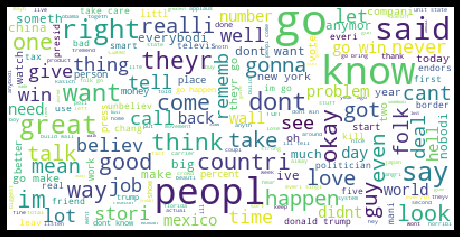

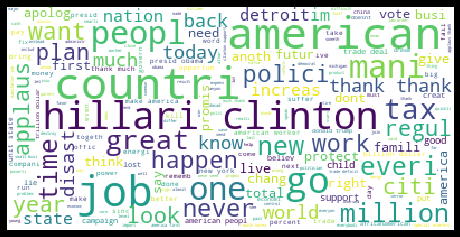

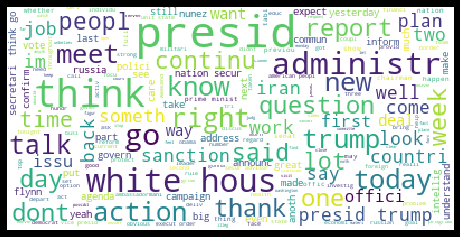

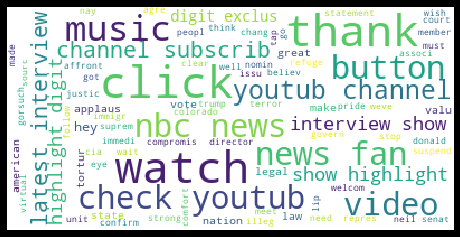

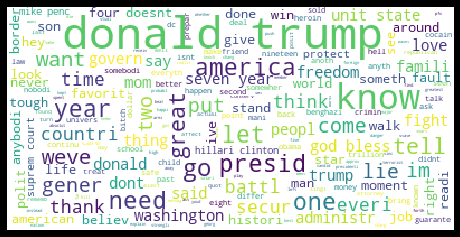

In [119]:
# print word clouds for each classifier
print("Word clouds from NMF:")
print(len(nmf_top_docs))
print_cloud_from_docs(nmf_top_docs)
print(sep)

Word clouds from LDA:


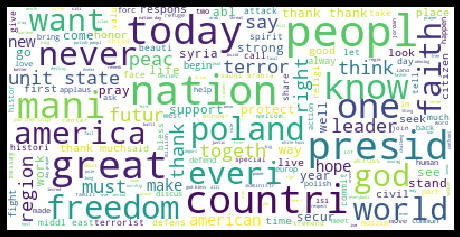

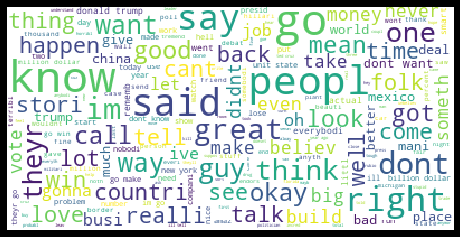

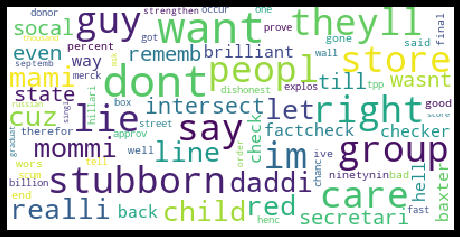

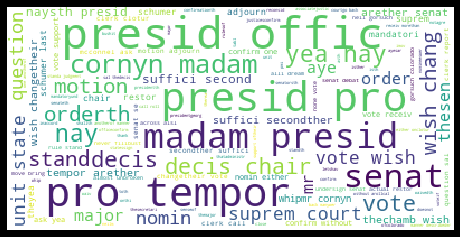

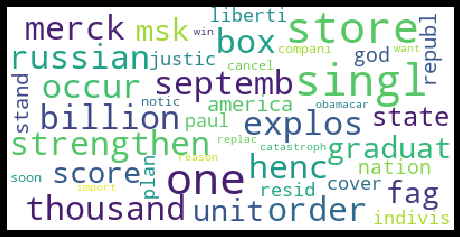

In [120]:
print("Word clouds from LDA:")
print_cloud_from_docs(lda_top_docs)
print(sep)

Word clouds from SVD:


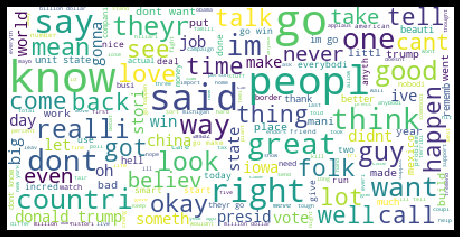

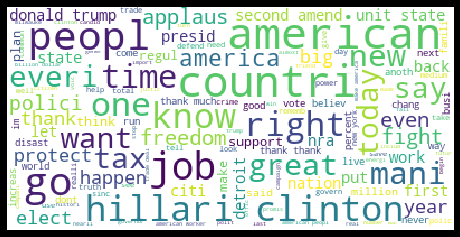

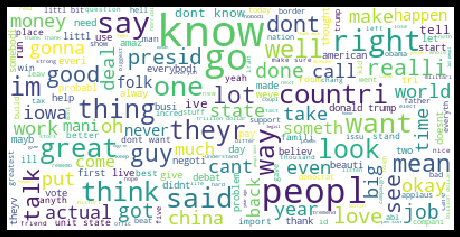

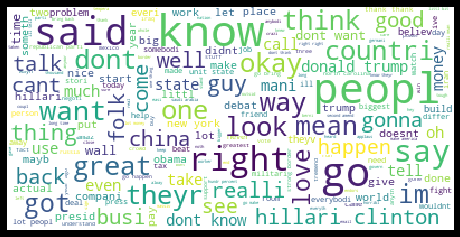

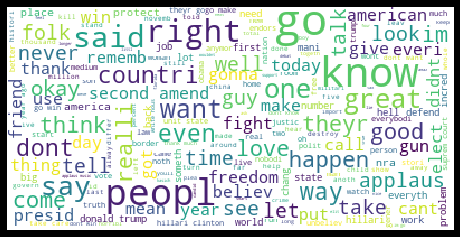

In [121]:
print("Word clouds from SVD:")
print_cloud_from_docs(lsi_top_docs)
print(sep)